In [1]:
from pathlib import Path
from tifffile.tifffile import imread
from matplotlib.pyplot import imshow
from metamorph_mda_parser.nd import NdInfo

In [2]:
input_dir = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024")

In [3]:
subfolders = [f for f in input_dir.iterdir() if f.is_dir() and not f.name=="Montage"]

In [4]:
subfolders

[WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/18h MG132'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/12h MG132'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/0h_no MG132'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/8h MG132')]

* Read confDAPI channel
* Segment nuclei
* Voronoi segmentation of cells
* Read Ub (aggresome) channel
* Threshold segmentation (with optional rolling-ball background subtraction)
* Connected-component analysis on aggresome channel
* Count and measure (area) aggresomes with nucleus label ID
* Export csv

In [7]:
nds = [nd for nd in subfolders[0].glob("*.nd")]

In [8]:
nds

[WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_1.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_10.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_11.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_12.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_13.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_14.nd'),
 WindowsPath('W:/scratch/gmatthia/Sucheta_Microscopy scratch/03062024/4h MG132/4h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_15.nd'),
 WindowsPath('

In [12]:
info = NdInfo.from_path(nds[0])

In [14]:
files = info.get_files()

In [18]:
nucleus_channel = "confDAPI"
nuclei = imread(files[files["channel_name"]==nucleus_channel]["path"][0])

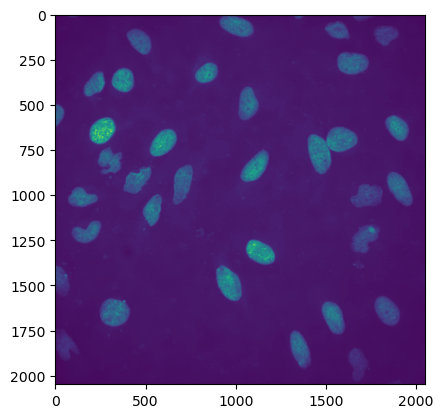

In [19]:
imshow(nuclei)

### Single example image

In [5]:
nd_file = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024\18h MG132\18h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_2.nd")
example_file_w1 = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024\18h MG132\18h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_2_w1confDAPI.tif")
example_file_w2 = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024\18h MG132\18h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_2_w2confGFP.tif")
example_file_w3 = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024\18h MG132\18h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_2_w3confmCherry.tif")
example_file_w4 = Path(r"W:\scratch\gmatthia\Sucheta_Microscopy scratch\03062024\18h MG132\18h_MG132_WT hela_dapi_actin_UB(FK2)_HDAC6_well 2_40x_2_w4confCy5.tif")


In [6]:
ndinfo = NdInfo.from_path(nd_file)

In [18]:
ndinfo.get_files()

,path,channel,channel_name,position,position_name,time
0,W:\scratch\gmatthia\Sucheta_Microscopy scratch...,0,confDAPI,0,None,0
1,W:\scratch\gmatthia\Sucheta_Microscopy scratch...,1,confGFP,0,None,0
2,W:\scratch\gmatthia\Sucheta_Microscopy scratch...,2,confmCherry,0,None,0
3,W:\scratch\gmatthia\Sucheta_Microscopy scratch...,3,confCy5,0,None,0


In [9]:
files = ndinfo.get_files()

In [15]:
example_file = files[files["channel"]==0]["path"][0]

In [16]:
image = imread(example_file)

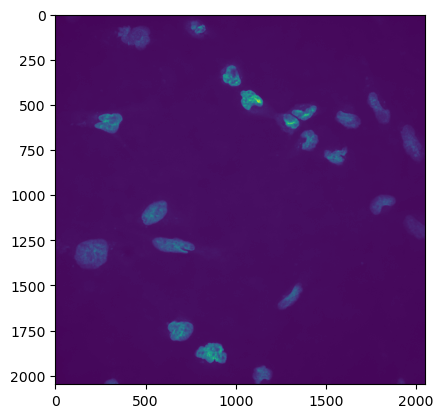

In [17]:
imshow(image)